home work 10.6

In [20]:
import cv2
import numpy as np
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

In [22]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
font = cv2.FONT_HERSHEY_SIMPLEX
while(1):
    dsp = img.copy()

    cv2.putText(dsp,"OpenCV("+str(ix)+","+str(iy)+")",(10,50), font, 1,(255,255,255),2,cv2.LINE_AA)

    cv2.imshow('image',dsp)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

KeyboardInterrupt: 

tutorial 1.4

In [4]:
import cv2
import numpy as np

In [32]:
cap = cv2.VideoCapture("tracking1.avi")
while(1):

    ret, frame = cap.read()
    if ret :
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        lower_blue = np.array([0,50,50])
        upper_blue = np.array([350,255,255])

        mask = cv2.inRange(hsv, lower_blue, upper_blue)

        res = cv2.bitwise_and(frame,frame, mask= mask)
        cv2.imshow('frame',frame)
        cv2.imshow('mask',mask)
        cv2.imshow('res',res)
    else :
        break
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

In [20]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print (flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

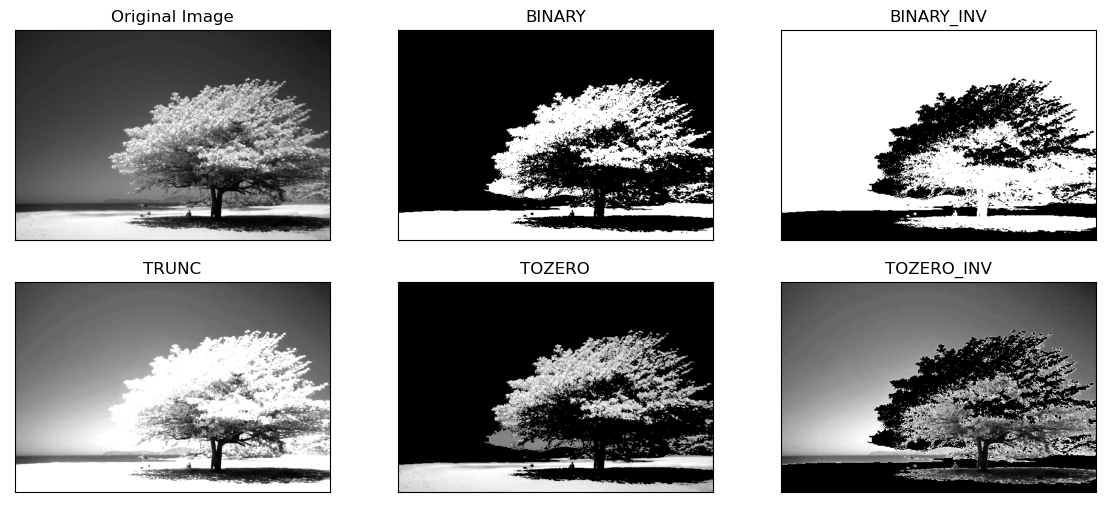

In [42]:
img = cv2.imread('grayimg.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(14,6))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

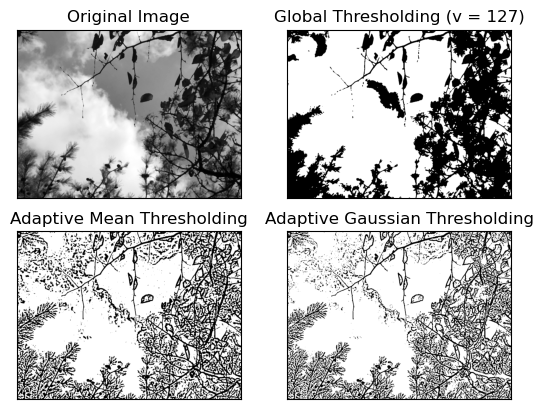

In [52]:
img = cv2.imread('graysss.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
    cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
    cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


In [69]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

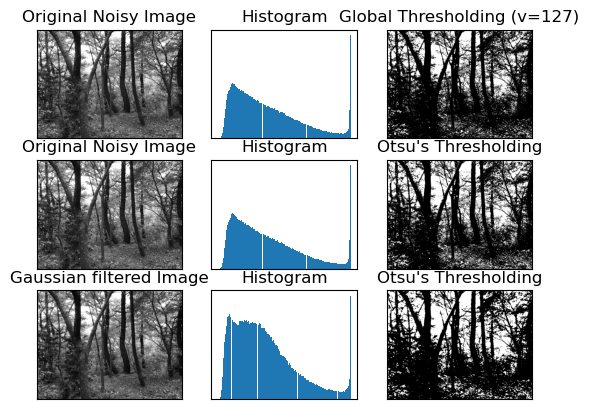

In [70]:
img = cv2.imread('grayss.jpg',0)
cv2.imwrite("ggrayss.jpg",img)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [75]:
img = cv2.imread('ggrayss.jpg',0)

blur = cv2.GaussianBlur(img,(5,5),0)
cv2.imwrite("ggrayss.jpg",blur)
# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
    print(thresh, fn_min)


-1 inf
-1 inf
-1 inf
-1 inf
-1 inf
-1 inf
-1 inf
-1 inf
-1 inf
10 369480.4422953407
11 369475.8501638162
12 369466.89385515195
13 369440.65922510304
14 369377.91629628855
15 369203.57479725406
16 368800.66585247725
17 368077.2732077491
18 366875.5118506443
19 365184.96735713514
20 362871.07172135176
21 359809.8727567415
22 356368.50835270225
23 352652.02273329394
24 348658.7073923171
25 344383.3570807058
26 339958.2397160292
27 335264.37476374314
28 330566.36270964076
29 325730.66846117954
30 320795.95731825207
31 315909.48307387746
32 311041.2146680742
33 306183.3648816657
34 301445.4800862849
35 297004.99540335964
36 292588.1020372643
37 288397.2710715995
38 284255.2976184496
39 280104.396698478
40 276116.35365606466
41 272041.5569505252
42 268173.9319903388
43 264421.8340394611
44 260602.72130706723
45 256905.20545455816
46 253232.45166445707
47 249687.06813296236
48 246082.31809342292
49 242464.08054003745
50 238955.7749269204
51 235470.89957653361
52 231993.55007694155
53 228656.8

C:\Users\u303\AppData\Local\Temp\ipykernel_7420\133567431.py:17: RuntimeWarning: invalid value encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\u303\AppData\Local\Temp\ipykernel_7420\133567431.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\u303\AppData\Local\Temp\ipykernel_7420\133567431.py:20: RuntimeWarning: invalid value encountered in double_scalars
  fn = v1*q1 + v2*q2


In [74]:
# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print (thresh,ret)

115 114.0
